In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pylab import *
mpl.rcParams['font.sans-serif'] =['SimHei']

In [2]:
df = pd.read_csv('qiancheng_data.csv',encoding='gbk')

In [3]:
df.head(10)

,title,company_name,salary,company_site,experience_required,edu_required,release_time,company_welfare,job_info,company_location,company_info
0,Python开发工程师,联合永道（上海）信息技术有限公司,1-1.5万/月,北京-顺义区,无工作经验,招3人,12-06发布,"['五险一金', '免费班车', '员工旅游', '交通补贴', '餐饮补贴', '工作环境...","['1.精通Python', '2.熟悉SQL语言，能熟练使用mysql，了解常用的SQL性...",'北京市顺义区后沙峪 中国航信高科技产业园',联合永道是一家专注于教育领域软件产品研发与销售的高新技术企业，主要从事教育软件产品的开发及应...
1,Python实习-机器学习方向,寰宇优才教育科技（北京）有限公司,0.8-1万/月,北京-朝阳区,无工作经验,招6人,12-06发布,"['五险一金', '补充医疗保险', '补充公积金', '员工旅游', '交通补贴', '出...","['（能力不足，但有Python开发意向者，可放宽要求提供实习岗位）', '', '1.本科...",'新文化大街',寰宇优才教育科技（北京）有限公司
2,Python开发工程师,北京万维盈创科技发展有限公司,0.8-1.5万/月,北京-昌平区,无工作经验,本科,12-06发布,"['年终奖金', '员工旅游', '定期体检', '专业培训', '交通补贴', '通讯补贴...","['岗位职责：', '1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划；', '2....",'北七家镇TBD云集中心',北京万维盈创科技发展有限公司（简称万维盈创）是一家专业的环保物联网产品与解决方案提供商。公司...
3,Python开发工程师,北京学神科技有限公司,1-1.5万/月,北京-昌平区,3-4年经验,大专,12-06发布,"['弹性工作', '年终奖金', '绩效奖金', '专业培训', '周末双休']","['', '岗位职责：', '1.围绕项目开展教学工作；', '2.给学生讲授知识点技术点以...",'昌平南邵',“学神IT教育”（网址：www.xuegod.cn）是北京学神科技有限公司旗下的在线教育品牌...
4,Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066),北京融联世纪信息技术有限公司,3-5万/月,北京,无工作经验,本科,12-06发布,[],"['1.负责RC系统整体规划工作,负责团队工作；2.负责风控系统在线服务的设计、优化和研发工...",'时代网络大厦',融360（www、rong360、com）北京融联世纪信息技术有限公司，成立于2011年10...
5,全栈python开发工程师,北京道冲泰科科技有限公司,15-20万/年,北京-朝阳区,5-7年经验,本科,12-06发布,"['五险一金', '补充医疗保险', '员工旅游', '交通补贴', '餐饮补贴', '通讯...","['工作描述:', '*为桥梁、隧道、地铁等施工建设过程开发安全监测web平台', '*为公...",'北京市朝阳区酒仙桥中路26号鸿运大厦801',北京道冲泰科科技有限公司（DCTK）是欧美大地科技集团（ETG）旗下的一家以研发和生产土木工...
6,Python高级开发工程师,叠云（北京）科技股份有限公司,1.2-1.5万/月,北京,无工作经验,本科,12-06发布,"['五险一金', '定期体检', '周末双休']","['岗位职责：', '1、进行电子教室后台部分研发', '2、进行云端运维系统的研发', '...",'朝阳区北苑天畅园6号楼23层',"叠云（北京）科技股份有限公司（股票代码：871400,简称：叠云股份)是联想集团直接投资专注..."
7,Python高级开发工程师,南京高泰科技有限公司,2-2.5万/月,北京-石景山区,5-7年经验,本科,12-06发布,"['五险一金', '员工旅游', '餐饮补贴', '通讯补贴', '定期体检', '周末双休...","['1.5年以上开发经验，基本功扎实，精通Java；', '2.5年以上Linux经验，熟练...",'北京市石景山区苹果园街道八大处路45号点石商务公园8号楼7楼',我公司成立于2003年12月，是专业从事电信类软件开发和系统集成项目的科技型企业。公司拥有一...
8,Python开发工程师(石家庄）,北京慧铭软件有限公司,0.8-1万/月,石家庄,3-4年经验,大专,12-06发布,"['五险一金', '餐饮补贴', '专业培训', '绩效奖金', '年终奖金', '弹性工作']","['', 'Python', '岗位职责：', '1、负责运维自动化、监控、数据分析平台的开...",'河北省石家庄市裕华区昆仑大街89号中国移动通信',北京慧铭软件有限公司成立于2014年，公司专注于信息技术服务管理应用软件产品的策划、设计、研...
9,Python开发工程师-ZH,北京四维图新科技股份有限公司,2-4万/月,北京,5-7年经验,本科,12-06发布,"['五险一金', '补充医疗保险', '免费班车', '员工旅游', '专业培训', '餐饮...","['岗位职责：', '1、负责公司内部管理后台及商业化应用产品的开发；', '2、负责项目文...",'北京市海淀区永丰路与北清路交汇处四维图新大厦',北京四维图新科技股份有限公司（简称：四维图新，深交所股票代码：002405）是中国领先的数字...


# 薪资分布

In [4]:
df[df.company_site.str.startswith('北京')==False] =np.nan

In [5]:
df=df.dropna()

In [6]:
df.columns

Index(['title', 'company_name', 'salary', 'company_site',
       'experience_required', 'edu_required', 'release_time',
       'company_welfare', 'job_info', 'company_location', 'company_info'],
      dtype='object')

In [7]:
df.groupby('salary').count()['title']

salary
0.4-1万/月        1
0.5-1.2万/月      2
0.5-1.5万/月      8
0.5-1万/月       20
0.5-2万/月        3
0.6-1.2万/月     32
0.6-1.3万/月      2
0.6-1.4万/月      1
0.6-1.5万/月     10
0.6-1.7万/月      1
0.6-1.8万/月      2
0.6-1万/月       51
0.6-2万/月        2
0.7-1.1万/月      6
0.7-1.2万/月      6
0.7-1.3万/月      3
0.7-1.4万/月     21
0.7-1.5万/月     10
0.7-1.6万/月      1
0.7-1万/月       12
0.7-2.2万/月      1
0.7-2.5万/月      1
0.7-2万/月        1
0.8-1.1万/月      5
0.8-1.2万/月     58
0.8-1.3万/月      9
0.8-1.4万/月     12
0.8-1.5万/月    141
0.8-1.6万/月     45
0.8-1.8万/月     10
             ... 
5-6.5千/月        1
5-6千/月          4
5-7.5万/月        1
5-7万/月         14
5-7千/月          4
5-8万/月          4
5-8千/月         17
5-9千/月          5
5.5-6.5千/月      1
50-60万/年        2
6-10万/年         1
6-12万/年         1
6-8千/月         91
6-9千/月          1
6.7-9千/月        1
60-80万/年        3
7-10万/月         1
7-12万/年         3
7-12万/月         1
7-8.5千/月        1
7-9.9千/月        1
7-9千/月          8
70元/天           1
8-10万/年         2
8-1

# 北京那些地区提供的岗位比较多

In [8]:
df.groupby('company_site').count()['title']

company_site
北京         1345
北京-东城区      120
北京-丰台区      111
北京-大兴区      104
北京-延庆区        2
北京-房山区       19
北京-昌平区      149
北京-朝阳区     1015
北京-海淀区     1658
北京-石景山区      41
北京-西城区      169
北京-通州区       22
北京-门头沟区       3
北京-顺义区       16
Name: title, dtype: int64

In [9]:
city_fenbu = df.groupby('company_site').count()['title']

In [10]:
city_fenbu.index

Index(['北京', '北京-东城区', '北京-丰台区', '北京-大兴区', '北京-延庆区', '北京-房山区', '北京-昌平区',
       '北京-朝阳区', '北京-海淀区', '北京-石景山区', '北京-西城区', '北京-通州区', '北京-门头沟区', '北京-顺义区'],
      dtype='object', name='company_site')

([<matplotlib.patches.Wedge at 0x1f90ed47278>,
 [Text(0.696538,0.851372,'北京'),
  Text(-0.302258,1.05766,'北京-东城区'),
  Text(-0.458931,0.999691,'北京-丰台区'),
  Text(-0.595314,0.924987,'北京-大兴区'),
  Text(-0.658336,0.881246,'北京-延庆区'),
  Text(-0.670451,0.872064,'北京-房山区'),
  Text(-0.762572,0.79277,'北京-昌平区'),
  Text(-1.09917,0.0426975,'北京-朝阳区'),
  Text(0.163708,-1.08775,'北京-海淀区'),
  Text(1.04977,-0.328608,'北京-石景山区'),
  Text(1.08503,-0.180866,'北京-西城区'),
  Text(1.09914,-0.0434206,'北京-通州区'),
  Text(1.09971,-0.025333,'北京-门头沟区'),
  Text(1.09994,-0.0115815,'北京-顺义区')],
 [Text(0.37993,0.464385,'28.17%'),
  Text(-0.164868,0.576904,'2.51%'),
  Text(-0.250326,0.545286,'2.33%'),
  Text(-0.324717,0.504539,'2.18%'),
  Text(-0.359092,0.480679,'0.04%'),
  Text(-0.365701,0.475671,'0.40%'),
  Text(-0.415949,0.43242,'3.12%'),
  Text(-0.599548,0.0232895,'21.26%'),
  Text(0.0892953,-0.593318,'34.73%'),
  Text(0.572602,-0.179241,'0.86%'),
  Text(0.591834,-0.0986541,'3.54%'),
  Text(0.599532,-0.023684,'0.46%'),
  Text(0

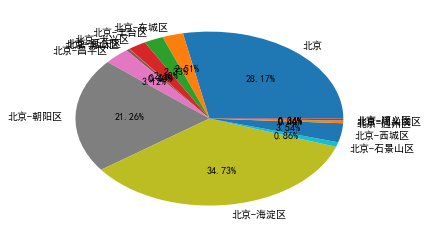

In [11]:
plt.pie(df.groupby('company_site').count()['title'],labels=city_fenbu.index,autopct='%1.2f%%')

# 工作年限要求

In [12]:
df.head(1)

,title,company_name,salary,company_site,experience_required,edu_required,release_time,company_welfare,job_info,company_location,company_info
0,Python开发工程师,联合永道（上海）信息技术有限公司,1-1.5万/月,北京-顺义区,无工作经验,招3人,12-06发布,"['五险一金', '免费班车', '员工旅游', '交通补贴', '餐饮补贴', '工作环境...","['1.精通Python', '2.熟悉SQL语言，能熟练使用mysql，了解常用的SQL性...",'北京市顺义区后沙峪 中国航信高科技产业园',联合永道是一家专注于教育领域软件产品研发与销售的高新技术企业，主要从事教育软件产品的开发及应...


In [13]:
df.groupby('experience_required').count()

,title,company_name,salary,company_site,edu_required,release_time,company_welfare,job_info,company_location,company_info
experience_required,,,,,,,,,,
10年以上经验,19,19,19,19,19,19,19,19,19,19
1年经验,327,327,327,327,327,327,327,327,327,327
2年经验,735,735,735,735,735,735,735,735,735,735
3-4年经验,1501,1501,1501,1501,1501,1501,1501,1501,1501,1501
5-7年经验,601,601,601,601,601,601,601,601,601,601
8-9年经验,34,34,34,34,34,34,34,34,34,34
无工作经验,1557,1557,1557,1557,1557,1557,1557,1557,1557,1557


In [14]:
gongzuojingyan = df.groupby('experience_required').count()['title']

In [15]:
gongzuojingyan.index

Index(['10年以上经验', '1年经验', '2年经验', '3-4年经验', '5-7年经验', '8-9年经验', '无工作经验'], dtype='object', name='experience_required')

([<matplotlib.patches.Wedge at 0x1f90edf2240>,
 [Text(1.09991,0.0137532,'10年以上经验'),
  Text(1.06842,0.261679,'1年经验'),
  Text(0.649605,0.887701,'2年经验'),
  Text(-0.818879,0.734464,'3-4年经验'),
  Text(-0.874265,-0.667578,'5-7年经验'),
  Text(-0.528127,-0.964926,'8-9年经验'),
  Text(0.571381,-0.939959,'无工作经验')],
 [Text(0.599953,0.00750172,'0.40%'),
  Text(0.582775,0.142734,'6.85%'),
  Text(0.35433,0.484201,'15.40%'),
  Text(-0.446661,0.400617,'31.44%'),
  Text(-0.476872,-0.364133,'12.59%'),
  Text(-0.288069,-0.526323,'0.71%'),
  Text(0.311662,-0.512705,'32.61%')])

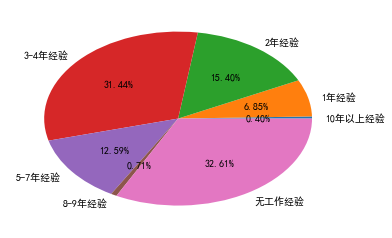

In [16]:
plt.pie(df.groupby('experience_required').count()['title'],labels=gongzuojingyan.index,autopct='%1.2f%%')

# 需要的技能  此条作废 下条为真需要的技能

In [17]:
df.head(1)

,title,company_name,salary,company_site,experience_required,edu_required,release_time,company_welfare,job_info,company_location,company_info
0,Python开发工程师,联合永道（上海）信息技术有限公司,1-1.5万/月,北京-顺义区,无工作经验,招3人,12-06发布,"['五险一金', '免费班车', '员工旅游', '交通补贴', '餐饮补贴', '工作环境...","['1.精通Python', '2.熟悉SQL语言，能熟练使用mysql，了解常用的SQL性...",'北京市顺义区后沙峪 中国航信高科技产业园',联合永道是一家专注于教育领域软件产品研发与销售的高新技术企业，主要从事教育软件产品的开发及应...


In [18]:
aaa = []
job = df.job_info

In [19]:

for i in job:
    #if a == 0 :
        #print(i)
    #aaa.append(i.replace('\t','').replace('\n',''))
    #i.replace('xa0','').replace('&nbsp','')

    aaa.append(i)
    #a+=1

In [20]:
wordcloud = WordCloud(font_path='./fonts/simhei.ttf',background_color='white')

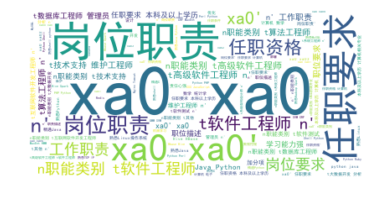

In [21]:

wordcloud.generate(str(aaa))
plt.axis('off')
plt.imshow(wordcloud,interpolation='bilinear')

# 需要的技能

In [22]:
df = pd.read_csv('51job.csv')

In [24]:
df.columns=['skill_type','city','company_name','company_size','company_type','company_description','company_location','salary','job_required','experience_required','company_welfare']

In [25]:
df[df.city.str.startswith('北京')==False] =np.nan
df=df.dropna()

In [26]:
wc = WordCloud(font_path='./fonts/simhei.ttf',background_color='white')


In [27]:
a = 0
job_count=[]
job = df.job_required
for i in job :
    
    
    job_count.append(i)
    
        
        
    #job_count.append(i)
    a+=1

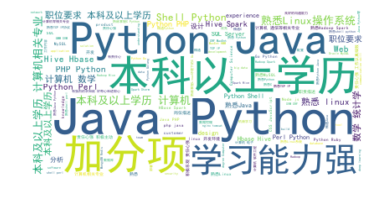

In [28]:
wc.generate(str(job_count).replace('岗位职责','').replace('工作职责','').replace('岗位要求','').replace('任职要求','').replace('职位描述','').replace('任职资格','').replace('岗位需求',''))
plt.axis('off')
plt.imshow(wc,interpolation='bilinear')

# 公司福利

In [29]:
df.head(1)

,skill_type,city,company_name,company_size,company_type,company_description,company_location,salary,job_required,experience_required,company_welfare
0,Python开发工程师,北京-昌平区,北京万维盈创科技发展有限公司,150-500人,仪器仪表/工业自动化\r\n环保,北京万维盈创科技发展有限公司（简称万维盈创）是一家专业的环保物联网产品与解决方案提供商。公司...,上班地址：北七家镇TBD云集中心,0.8-1.5万/月,岗位职责：1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划； 2.协助团队撰写设计开...,无工作经验,年终奖金\r\n员工旅游\r\n定期体检\r\n专业培训\r\n交通补贴\r\n通讯补贴\r...


In [30]:
fuli_count = []
fuli = df.company_welfare
for i in fuli:
    fuli_count.append(i)

In [31]:
wc_fuli = WordCloud(font_path='./fonts/simhei.ttf',background_color='white')

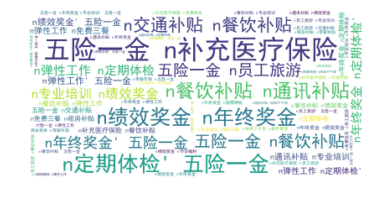

In [32]:
wc_fuli.generate(str(fuli_count))
plt.axis('off')
plt.imshow(wc_fuli,interpolation='bilinear')

# 薪资和地区的关系

In [33]:
df.head(1)

,skill_type,city,company_name,company_size,company_type,company_description,company_location,salary,job_required,experience_required,company_welfare
0,Python开发工程师,北京-昌平区,北京万维盈创科技发展有限公司,150-500人,仪器仪表/工业自动化\r\n环保,北京万维盈创科技发展有限公司（简称万维盈创）是一家专业的环保物联网产品与解决方案提供商。公司...,上班地址：北七家镇TBD云集中心,0.8-1.5万/月,岗位职责：1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划； 2.协助团队撰写设计开...,无工作经验,年终奖金\r\n员工旅游\r\n定期体检\r\n专业培训\r\n交通补贴\r\n通讯补贴\r...


In [38]:
df.groupby(['salary','city']).count()['skill_type']

salary      city   
0.4-1万/月    北京-海淀区      1
0.5-1.5万/月  北京-朝阳区      2
            北京-海淀区      3
            北京-通州区      1
0.5-1万/月    北京          9
            北京-东城区      4
            北京-朝阳区      1
            北京-海淀区      3
            北京-西城区      2
0.5-2万/月    北京-海淀区      1
0.6-1.2万/月  北京          6
            北京-大兴区      1
            北京-房山区      5
            北京-昌平区      3
            北京-朝阳区      7
            北京-海淀区     16
            北京-西城区      2
            北京-通州区      1
0.6-1.4万/月  北京-东城区      1
0.6-1.5万/月  北京          2
            北京-东城区      1
            北京-朝阳区      1
            北京-海淀区      4
            北京-石景山区     1
0.6-1.8万/月  北京-昌平区      1
0.6-1万/月    北京         14
            北京-昌平区      6
            北京-朝阳区      5
            北京-海淀区     20
0.6-2万/月    北京-昌平区      1
                       ..
6-8千/月      北京-昌平区      1
            北京-朝阳区     15
            北京-海淀区     17
            北京-石景山区     1
            北京-西城区      5
6-9千/月      北京-海淀区      1
6.7-9千/月    北京-昌平区

In [35]:
city_money = df.groupby(['salary','city']).count()['skill_type']

In [36]:
type(city_money)

pandas.core.series.Series

In [37]:
len(city_money)

680

# 薪资和工作年限的关系

In [39]:
df.head(2)

,skill_type,city,company_name,company_size,company_type,company_description,company_location,salary,job_required,experience_required,company_welfare
0,Python开发工程师,北京-昌平区,北京万维盈创科技发展有限公司,150-500人,仪器仪表/工业自动化\r\n环保,北京万维盈创科技发展有限公司（简称万维盈创）是一家专业的环保物联网产品与解决方案提供商。公司...,上班地址：北七家镇TBD云集中心,0.8-1.5万/月,岗位职责：1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划； 2.协助团队撰写设计开...,无工作经验,年终奖金\r\n员工旅游\r\n定期体检\r\n专业培训\r\n交通补贴\r\n通讯补贴\r...
1,Python开发工程师,北京-昌平区,北京学神科技有限公司,少于50人,计算机软件\r\n教育/培训/院校,“学神IT教育”（网址：www.xuegod.cn）是北京学神科技有限公司旗下的在线教育品牌...,上班地址：昌平南邵,1-1.5万/月,岗位职责：1.围绕项目开展教学工作；2.给学生讲授知识点技术点以及项目实现思路；3.模拟公司...,3-4年经验,弹性工作\r\n年终奖金\r\n绩效奖金\r\n专业培训\r\n周末双休


In [40]:
df.groupby(['salary','experience_required']).count()

skill_type  city  company_name  company_size  \
salary     experience_required                                                 
0.4-1万/月   无工作经验                         1     1             1             1   
0.5-1.5万/月 1年经验                          2     2             2             2   
           2年经验                          4     4             4             4   
0.5-1万/月   1年经验                          4     4             4             4   
           2年经验                          3     3             3             3   
           无工作经验                        12    12            12            12   
0.5-2万/月   无工作经验                         1     1             1             1   
0.6-1.2万/月 1年经验                         19    19            19            19   
           2年经验                          4     4             4             4   
           3-4年经验                        4     4             4             4   
           无工作经验                        14    14            14            14   
0.6-1.4万/月 2年经验                          1     1             1             1   
0.6-1.5万/月 1年经验                          4     4             4             4   
           2年经验                          4     4             4             4   
           无工作经验                         1     1             1             1   
0.6-1.8万/月 无工作经验                         1     1             1             1   
0.6-1万/月   1年经验                         11    11            11            11   
           2年经验                         11    11            11            11   
           3-4年经验                        6     6             6             6   
           无工作经验                        17    17            17            17   
0.6-2万/月   1年经验                          1     1             1             1   
0.7-1.1万/月 无工作经验                         1     1             1             1   
0.7-1.2万/月 1年经验                          1     1             1             1   
           2年经验                          2     2             2             2   
           无工作经验                         2     2             2             2   
0.7-1.3万/月 无工作经验                         2     2             2             2   
0.7-1.4万/月 1年经验                          3     3             3             3   
           2年经验                          4     4             4             4   
           3-4年经验                        4     4             4             4   
           无工作经验                         4     4             4             4   
...                                    ...   ...           ...           ...   
6-12万/年    3-4年经验                        1     1             1             1   
6-8千/月     1年经验                         11    11            11            11   
           2年经验                         16    16            16            16   
           3-4年经验                        2     2             2             2   
           无工作经验                        44    44            44            44   
6-9千/月     2年经验                          1     1             1             1   
6.7-9千/月   无工作经验                         1     1             1             1   
7-10万/月    5-7年经验                        1     1             1             1   
7-12万/年    1年经验                          5     5             5             5   
           2年经验                          1     1             1             1   
7-12万/月    5-7年经验                        1     1             1             1   
7-15万/年    3-4年经验                        1     1             1             1   
7-16万/年    2年经验                          1     1             1             1   
7-8.5千/月   1年经验                          1     1             1             1   
7-9.9千/月   1年经验                          1     1             1             1   
7-9千/月     1年经验                          3     3             3             3   
           2年经验                          1     1             1             1   
           无工作经验                

In [41]:
df.groupby(['salary','experience_required']).count()['skill_type']

salary      experience_required
0.4-1万/月    无工作经验                   1
0.5-1.5万/月  1年经验                    2
            2年经验                    4
0.5-1万/月    1年经验                    4
            2年经验                    3
            无工作经验                  12
0.5-2万/月    无工作经验                   1
0.6-1.2万/月  1年经验                   19
            2年经验                    4
            3-4年经验                  4
            无工作经验                  14
0.6-1.4万/月  2年经验                    1
0.6-1.5万/月  1年经验                    4
            2年经验                    4
            无工作经验                   1
0.6-1.8万/月  无工作经验                   1
0.6-1万/月    1年经验                   11
            2年经验                   11
            3-4年经验                  6
            无工作经验                  17
0.6-2万/月    1年经验                    1
0.7-1.1万/月  无工作经验                   1
0.7-1.2万/月  1年经验                    1
            2年经验                    2
            无工作经验                   2
0.7-1.3万/月  无工作经验 

# 学历的要求

In [51]:
df1 = pd.read_csv('qianchengwuyou.csv',encoding='gbk')

In [52]:
df1.head()

,city,skill_type,company_name,company_size,company_type,company_location,skills_required,edu_required,experience_required,company_url
0,北京??,高级Python后端工程师,达观数据,50-150人,计算机软件\n互联网/电子商务,\n上班地址：海淀区知春路 量子芯座大厦20层\t\t\t\t\t\t\t,职位描述：1、负责业务需求分析，将业务需求拆分成独立的业务功能；2、带领技术团队进行软件项目...,本科,5-7年经验,https://jobs.51job.com/beijing/107068355.html?...
1,北京-顺义区??,Python开发工程师,联合永道（上海）信息技术有限公司,500-1000人,计算机软件,\n上班地址：北京市顺义区后沙峪 中国航信高科技产业园\t\t\t\t\t\t\t,1. 精通Python 2. 熟悉SQL语言，能熟练使用mysql，了解常用的SQL性能优化...,无学历要求,无工作经验,https://jobs.51job.com/beijing-syq/109010444.h...
2,北京-朝阳区??,Python实习-机器学习方向,寰宇优才教育科技（北京）有限公司,150-500人,计算机软件,\n上班地址：新文化大街\t\t\t\t\t\t\t,（能力不足，但有Python开发意向者，可放宽要求提供实习岗位）1.本科以上学历，有良好的数...,无学历要求,无工作经验,https://jobs.51job.com/beijing-cyq/104283209.h...
3,北京-昌平区??,Python开发工程师,北京万维盈创科技发展有限公司,150-500人,仪器仪表/工业自动化\n环保,\n上班地址：北七家镇TBD云集中心\t\t\t\t\t\t\t,岗位职责：1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划； 2.协助团队撰写设计开...,本科,无工作经验,https://jobs.51job.com/beijing-cpq/108973792.h...
4,北京-昌平区??,Python开发工程师,北京学神科技有限公司,少于50人,计算机软件\n教育/培训/院校,\n上班地址：昌平南邵\t\t\t\t\t\t\t,岗位职责：1.围绕项目开展教学工作；2.给学生讲授知识点技术点以及项目实现思路；3.模拟公司...,大专,3-4年经验,https://jobs.51job.com/beijing-cpq/108738668.h...


In [44]:
len(df)

3998

In [53]:
df.city.head()

0     北京-昌平区
1     北京-昌平区
3     北京-朝阳区
4         北京
5    北京-石景山区
Name: city, dtype: object

In [45]:
len(df1)

5792

In [59]:
df1[df1.city.str.startswith('北京')==False] =np.nan


In [64]:
df1.head(2)

,city,skill_type,company_name,company_size,company_type,company_location,skills_required,edu_required,experience_required,company_url
0,北京??,高级Python后端工程师,达观数据,50-150人,计算机软件\n互联网/电子商务,\n上班地址：海淀区知春路 量子芯座大厦20层\t\t\t\t\t\t\t,职位描述：1、负责业务需求分析，将业务需求拆分成独立的业务功能；2、带领技术团队进行软件项目...,本科,5-7年经验,https://jobs.51job.com/beijing/107068355.html?...
1,北京-顺义区??,Python开发工程师,联合永道（上海）信息技术有限公司,500-1000人,计算机软件,\n上班地址：北京市顺义区后沙峪 中国航信高科技产业园\t\t\t\t\t\t\t,1. 精通Python 2. 熟悉SQL语言，能熟练使用mysql，了解常用的SQL性能优化...,无学历要求,无工作经验,https://jobs.51job.com/beijing-syq/109010444.h...


In [65]:
df1.groupby(['edu_required']).count()

,city,skill_type,company_name,company_size,company_type,company_location,skills_required,experience_required,company_url
edu_required,,,,,,,,,
中专,6,6,6,6,6,6,6,6,6
初中及以下,2,2,2,2,2,2,2,2,2
博士,27,27,27,24,25,27,27,27,27
大专,471,471,471,466,470,471,471,471,471
无学历要求,938,938,938,922,934,938,938,938,938
本科,3617,3617,3617,3434,3540,3617,3616,3617,3617
硕士,487,487,487,428,465,487,487,487,487


In [71]:
xueli = df1.groupby(['edu_required']).count()['city']
xueli.index

Index(['中专', '初中及以下', '博士', '大专', '无学历要求', '本科', '硕士'], dtype='object', name='edu_required')

([<matplotlib.patches.Wedge at 0x1f9104fa780>,
 [Text(1.83999,0.00625146,'中专'),
  Text(2.59992,0.0206115,'初中及以下'),
  Text(1.09967,0.0267813,'博士'),
  Text(1.04879,0.331733,'大专'),
  Text(0.494833,0.982415,'无学历要求'),
  Text(-0.942399,-0.567348,'本科'),
  Text(1.05844,-0.299514,'硕士')],
 [Text(1.33999,0.0045527,'0.11%'),
  Text(2.09993,0.0166478,'0.04%'),
  Text(0.599822,0.014608,'0.49%'),
  Text(0.572065,0.180945,'8.49%'),
  Text(0.269909,0.535863,'16.91%'),
  Text(-0.514036,-0.309463,'65.19%'),
  Text(0.57733,-0.163371,'8.78%')])

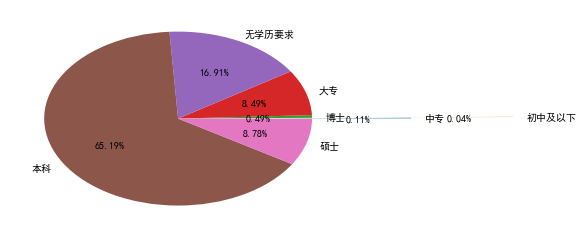

In [78]:
plt.pie(xueli,labels=xueli.index,autopct='%1.2f%%',explode=[0.74,1.5,0,0,0,0,0])

# skill_type 各种工作需求

In [85]:
df1.head(8)

,city,skill_type,company_name,company_size,company_type,company_location,skills_required,edu_required,experience_required,company_url
0,北京??,高级Python后端工程师,达观数据,50-150人,计算机软件\n互联网/电子商务,\n上班地址：海淀区知春路 量子芯座大厦20层\t\t\t\t\t\t\t,职位描述：1、负责业务需求分析，将业务需求拆分成独立的业务功能；2、带领技术团队进行软件项目...,本科,5-7年经验,https://jobs.51job.com/beijing/107068355.html?...
1,北京-顺义区??,Python开发工程师,联合永道（上海）信息技术有限公司,500-1000人,计算机软件,\n上班地址：北京市顺义区后沙峪 中国航信高科技产业园\t\t\t\t\t\t\t,1. 精通Python 2. 熟悉SQL语言，能熟练使用mysql，了解常用的SQL性能优化...,无学历要求,无工作经验,https://jobs.51job.com/beijing-syq/109010444.h...
2,北京-朝阳区??,Python实习-机器学习方向,寰宇优才教育科技（北京）有限公司,150-500人,计算机软件,\n上班地址：新文化大街\t\t\t\t\t\t\t,（能力不足，但有Python开发意向者，可放宽要求提供实习岗位）1.本科以上学历，有良好的数...,无学历要求,无工作经验,https://jobs.51job.com/beijing-cyq/104283209.h...
3,北京-昌平区??,Python开发工程师,北京万维盈创科技发展有限公司,150-500人,仪器仪表/工业自动化\n环保,\n上班地址：北七家镇TBD云集中心\t\t\t\t\t\t\t,岗位职责：1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划； 2.协助团队撰写设计开...,本科,无工作经验,https://jobs.51job.com/beijing-cpq/108973792.h...
4,北京-昌平区??,Python开发工程师,北京学神科技有限公司,少于50人,计算机软件\n教育/培训/院校,\n上班地址：昌平南邵\t\t\t\t\t\t\t,岗位职责：1.围绕项目开展教学工作；2.给学生讲授知识点技术点以及项目实现思路；3.模拟公司...,大专,3-4年经验,https://jobs.51job.com/beijing-cpq/108738668.h...
5,北京??,Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066),北京融联世纪信息技术有限公司,1000-5000人,互联网/电子商务,\n上班地址：时代网络大厦\t\t\t\t\t\t\t,"岗位职责:1.负责RC系统整体规划工作,负责团队工作；2.负责风控系统在线服务的设计、优化和...",本科,无工作经验,https://jobs.51job.com/beijing/108989384.html?...
6,北京-朝阳区??,全栈python开发工程师,北京道冲泰科科技有限公司,少于50人,仪器仪表/工业自动化\n电子技术/半导体/集成电路,\n上班地址：北京市朝阳区酒仙桥中路26号鸿运大厦801\t\t\t\t\t\t\t,工作描述:* 为桥梁、隧道、地铁等施工建设过程开发安全监测web平台* 为公司研发的监测传感...,本科,5-7年经验,https://jobs.51job.com/beijing-cyq/105265228.h...
7,北京??,Python高级开发工程师,叠云（北京）科技股份有限公司,50-150人,计算机软件\n互联网/电子商务,\n上班地址：朝阳区北苑天畅园6号楼23层\t\t\t\t\t\t\t,岗位职责：1、进行电子教室后台部分研发2、进行云端运维系统的研发3、与终端团队配合进行产品联...,本科,无工作经验,https://jobs.51job.com/beijing/105111236.html?...


In [83]:
len(df1[df1.skill_type == 'Python高级开发工程师'])

32

In [84]:
len(df1[df1.skill_type == 'Python开发工程师'])

92

In [86]:
len(df1[df1.skill_type == '全栈python开发工程师'])

3

In [150]:
skill_count=[]
skill_type = df1.skill_type


In [151]:
for i in skill_type:
    skill_count.append(i)

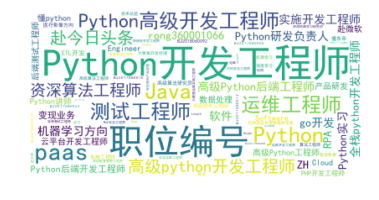

In [152]:
skill_wc = WordCloud(font_path='./fonts/simhei.ttf',background_color='white')
skill_wc.generate(str(skill_type))
plt.axis('off')
plt.imshow(skill_wc,interpolation='bilinear')

# company_size 公司的规模

In [87]:
df1.groupby('company_size').count()

,city,skill_type,company_name,company_type,company_location,skills_required,edu_required,experience_required,company_url
company_size,,,,,,,,,
1000-5000人,957,957,957,957,957,957,957,957,957
10000人以上,707,707,707,707,707,707,707,707,707
150-500人,1101,1101,1101,1101,1101,1101,1101,1101,1101
50-150人,966,966,966,966,966,966,966,966,966
500-1000人,825,825,825,825,825,824,825,825,825
5000-10000人,305,305,305,305,305,305,305,305,305
少于50人,421,421,421,421,421,421,421,421,421


In [89]:
com_size = df1.groupby('company_size').count()

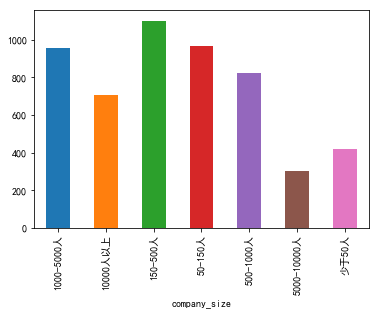

In [98]:
com_size['city'].plot(kind='bar')

In [100]:
com_size['city'].values

array([ 957,  707, 1101,  966,  825,  305,  421], dtype=int64)

([<matplotlib.patches.Wedge at 0x1f912c97128>,
 [Text(0.926567,0.592852,'1000-5000人'),
  Text(0.0130847,1.09992,'10000人以上'),
  Text(-0.961443,0.534441,'150-500人'),
  Text(-0.825494,-0.727021,'50-150人'),
  Text(0.236291,-1.07432,'500-1000人'),
  Text(0.853803,-0.693557,'5000-10000人'),
  Text(1.06569,-0.27257,'少于50人')],
 [Text(0.5054,0.323374,'18.12%'),
  Text(0.00713711,0.599958,'13.39%'),
  Text(-0.524424,0.291513,'20.84%'),
  Text(-0.45027,-0.396557,'18.29%'),
  Text(0.128886,-0.585993,'15.62%'),
  Text(0.465711,-0.378304,'5.77%'),
  Text(0.581288,-0.148675,'7.97%')])

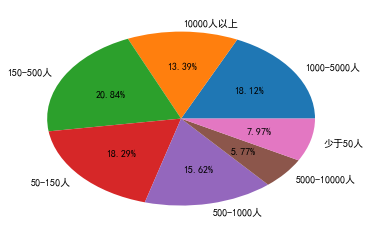

In [93]:
plt.pie(com_size['city'],labels=com_size.index,autopct='%1.2f%%')

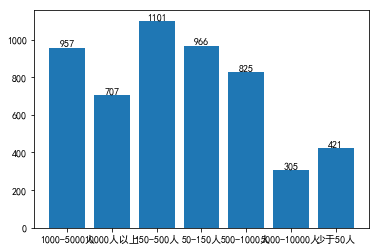

In [114]:
plt.bar(com_size.index,com_size['city'].values)
for  x ,y in zip(com_size.index,com_size['city'].values):
    plt.text(x,y,y,ha = 'center',va = 'bottom')

# company_type 各个公司的类型

In [116]:
df1.head(10)

,city,skill_type,company_name,company_size,company_type,company_location,skills_required,edu_required,experience_required,company_url
0,北京??,高级Python后端工程师,达观数据,50-150人,计算机软件\n互联网/电子商务,\n上班地址：海淀区知春路 量子芯座大厦20层\t\t\t\t\t\t\t,职位描述：1、负责业务需求分析，将业务需求拆分成独立的业务功能；2、带领技术团队进行软件项目...,本科,5-7年经验,https://jobs.51job.com/beijing/107068355.html?...
1,北京-顺义区??,Python开发工程师,联合永道（上海）信息技术有限公司,500-1000人,计算机软件,\n上班地址：北京市顺义区后沙峪 中国航信高科技产业园\t\t\t\t\t\t\t,1. 精通Python 2. 熟悉SQL语言，能熟练使用mysql，了解常用的SQL性能优化...,无学历要求,无工作经验,https://jobs.51job.com/beijing-syq/109010444.h...
2,北京-朝阳区??,Python实习-机器学习方向,寰宇优才教育科技（北京）有限公司,150-500人,计算机软件,\n上班地址：新文化大街\t\t\t\t\t\t\t,（能力不足，但有Python开发意向者，可放宽要求提供实习岗位）1.本科以上学历，有良好的数...,无学历要求,无工作经验,https://jobs.51job.com/beijing-cyq/104283209.h...
3,北京-昌平区??,Python开发工程师,北京万维盈创科技发展有限公司,150-500人,仪器仪表/工业自动化\n环保,\n上班地址：北七家镇TBD云集中心\t\t\t\t\t\t\t,岗位职责：1.协助团队进行桌面应用开开发框架的搭建、设计及开发规划； 2.协助团队撰写设计开...,本科,无工作经验,https://jobs.51job.com/beijing-cpq/108973792.h...
4,北京-昌平区??,Python开发工程师,北京学神科技有限公司,少于50人,计算机软件\n教育/培训/院校,\n上班地址：昌平南邵\t\t\t\t\t\t\t,岗位职责：1.围绕项目开展教学工作；2.给学生讲授知识点技术点以及项目实现思路；3.模拟公司...,大专,3-4年经验,https://jobs.51job.com/beijing-cpq/108738668.h...
5,北京??,Python研发负责人(001066)\t\t\t\t(职位编号：rong360001066),北京融联世纪信息技术有限公司,1000-5000人,互联网/电子商务,\n上班地址：时代网络大厦\t\t\t\t\t\t\t,"岗位职责:1.负责RC系统整体规划工作,负责团队工作；2.负责风控系统在线服务的设计、优化和...",本科,无工作经验,https://jobs.51job.com/beijing/108989384.html?...
6,北京-朝阳区??,全栈python开发工程师,北京道冲泰科科技有限公司,少于50人,仪器仪表/工业自动化\n电子技术/半导体/集成电路,\n上班地址：北京市朝阳区酒仙桥中路26号鸿运大厦801\t\t\t\t\t\t\t,工作描述:* 为桥梁、隧道、地铁等施工建设过程开发安全监测web平台* 为公司研发的监测传感...,本科,5-7年经验,https://jobs.51job.com/beijing-cyq/105265228.h...
7,北京??,Python高级开发工程师,叠云（北京）科技股份有限公司,50-150人,计算机软件\n互联网/电子商务,\n上班地址：朝阳区北苑天畅园6号楼23层\t\t\t\t\t\t\t,岗位职责：1、进行电子教室后台部分研发2、进行云端运维系统的研发3、与终端团队配合进行产品联...,本科,无工作经验,https://jobs.51job.com/beijing/105111236.html?...
8,北京-石景山区??,Python高级开发工程师,南京高泰科技有限公司,50-150人,计算机软件\n计算机服务(系统、数据服务、维修),\n上班地址：北京市石景山区苹果园街道八大处路45号点石商务公园8号楼7楼\t\t\t\t\...,1. 5年以上开发经验，基本功扎实，精通Java；2. ...,本科,5-7年经验,https://jobs.51job.com/beijing-sjsq/108942405....
9,北京??,Python开发工程师-ZH,北京四维图新科技股份有限公司,1000-5000人,互联网/电子商务\n计算机软件,\n上班地址：北京市海淀区永丰路与北清路交汇处四维图新大厦\t\t\t\t\t\t\t,岗位职责：1、负责公司内部管理后台及商业化应用产品的开发；2、负责项目文档编写、配合测试人员...,本科,5-7年经验,https://jobs.51job.com/beijing/108936717.html?...


In [117]:
com_type=[]
c_type = df1.company_type

In [118]:
for i in c_type:
    com_type.append(i)
com_type_wc = WordCloud(font_path='./fonts/simhei.ttf',background_color='white')

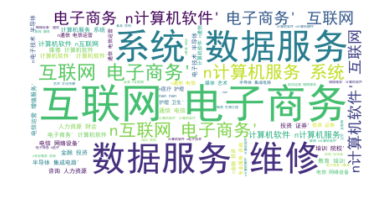

In [119]:
com_type_wc.generate(str(com_type))
plt.axis('off')
plt.imshow(com_type_wc,interpolation='bilinear')

In [120]:
df1.head(2)

,city,skill_type,company_name,company_size,company_type,company_location,skills_required,edu_required,experience_required,company_url
0,北京??,高级Python后端工程师,达观数据,50-150人,计算机软件\n互联网/电子商务,\n上班地址：海淀区知春路 量子芯座大厦20层\t\t\t\t\t\t\t,职位描述：1、负责业务需求分析，将业务需求拆分成独立的业务功能；2、带领技术团队进行软件项目...,本科,5-7年经验,https://jobs.51job.com/beijing/107068355.html?...
1,北京-顺义区??,Python开发工程师,联合永道（上海）信息技术有限公司,500-1000人,计算机软件,\n上班地址：北京市顺义区后沙峪 中国航信高科技产业园\t\t\t\t\t\t\t,1. 精通Python 2. 熟悉SQL语言，能熟练使用mysql，了解常用的SQL性能优化...,无学历要求,无工作经验,https://jobs.51job.com/beijing-syq/109010444.h...


# 放简历公司最多的前20名

In [127]:
df1.groupby('company_name').count()

,city,skill_type,company_size,company_type,company_location,skills_required,edu_required,experience_required,company_url
company_name,,,,,,,,,
(MORE VFX)墨境天合无锡数字图像科技有限公司北京分公司,3,3,3,3,3,3,3,3,3
360企业安全集团,1,1,1,1,1,1,1,1,1
360金融,2,2,2,2,2,2,2,2,2
4399.com（北京）,1,1,1,1,1,1,1,1,1
51Talk无忧英语深圳技术产品中心,2,2,2,2,2,2,2,2,2
91金融,3,3,3,3,3,3,3,3,3
A10 Networks Inc,4,4,4,4,4,4,4,4,4
ABB（中国）有限公司,2,2,2,2,2,2,2,2,2
Adhub（钧云）,5,5,5,5,5,5,5,5,5


In [128]:
com_name = df1.groupby('company_name').count()

In [135]:
com_name_cishu = com_name.sort_values(by='city',ascending=False)

In [137]:
com_name_cishu.head(20)

,city,skill_type,company_size,company_type,company_location,skills_required,edu_required,experience_required,company_url
company_name,,,,,,,,,
字节跳动,292,292,292,292,292,292,292,292,292
阿里巴巴集团,76,76,76,76,76,76,76,76,76
奇虎360科技有限公司,67,67,67,67,67,67,67,67,67
好大夫在线,58,58,58,58,58,58,58,58,58
深圳市腾讯计算机系统有限公司,50,50,50,50,50,50,50,50,50
北京四维图新科技股份有限公司,46,46,46,46,46,46,46,46,46
北京捷通华声科技股份有限公司,39,39,39,39,39,39,39,39,39
北京东方国信科技股份有限公司,38,38,38,38,38,38,38,38,38
滴滴出行,37,37,37,37,37,37,37,37,37


([<matplotlib.patches.Wedge at 0x1f90f582ac8>,
 [Text(0.651409,0.886378,'字节跳动'),
  Text(-0.572263,0.939423,'阿里巴巴集团'),
  Text(-0.929177,0.588754,'奇虎360科技有限公司'),
  Text(-1.0853,0.179221,'好大夫在线'),
  Text(-1.08165,-0.200083,'深圳市腾讯计算机系统有限公司'),
  Text(-0.970061,-0.518634,'北京四维图新科技股份有限公司'),
  Text(-0.794482,-0.760788,'北京捷通华声科技股份有限公司'),
  Text(-0.584274,-0.932,'北京东方国信科技股份有限公司'),
  Text(-0.345286,-1.0444,'滴滴出行'),
  Text(-0.0969458,-1.09572,'北京搜狗科技发展有限公司'),
  Text(0.142558,-1.09072,'深圳达闼科技控股有限公司'),
  Text(0.351981,-1.04217,'北京中油瑞飞信息技术有限责任公司'),
  Text(0.529496,-0.964175,'美团点评'),
  Text(0.687808,-0.85844,'软通动力信息技术（集团）有限公司'),
  Text(0.818482,-0.734906,'亚信科技（中国）有限公司'),
  Text(0.915718,-0.609475,'完美世界（北京）总部/完美时空'),
  Text(0.989309,-0.480904,'达内时代科技集团有限公司'),
  Text(1.04385,-0.346961,'IBM2019应届生招聘项目'),
  Text(1.07967,-0.210487,'美菜网'),
  Text(1.09774,-0.0705492,'北京金山数字娱乐科技有限公司')])

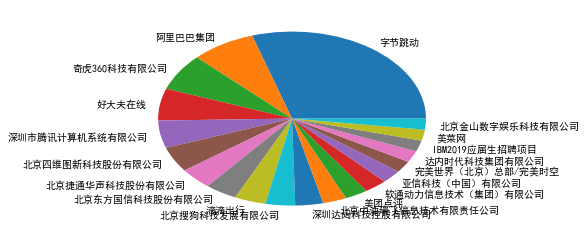

In [140]:
plt.pie(com_name_cishu.head(20)['city'],labels=com_name_cishu.head(20).index)

In [144]:
com_n_c_index= com_name_cishu.head(20).index

In [147]:
com_n_c_values = com_name_cishu.head(20)['city'].values

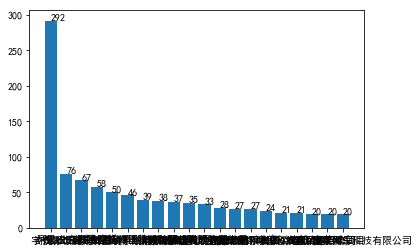

In [149]:
plt.bar(com_n_c_index,com_n_c_values)
for x,y in zip(com_n_c_index,com_n_c_values):
    plt.text(x,y,y)

In [153]:
ds = pd.DataFrame({'a':[1,2,3,4,5,6],'b':[4,5,6,7,8,9]})

In [155]:
ds

,a,b
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8
5,6,9


In [156]:
e = {'c':'np.nan'}

{'c': 'np.nan'}

In [158]:
ds.columns

Index(['a', 'b'], dtype='object')

In [165]:
ds['c'] = np.nan

In [164]:
ds

,a,b,c
0,1,4,NaN
1,2,5,NaN
2,3,6,NaN
3,4,7,NaN
4,5,8,NaN
5,6,9,NaN


In [167]:
ds.iloc[1:3,2]= ''

In [168]:
ds

,a,b,c
0,1,4,NaN
1,2,5,
2,3,6,
3,4,7,NaN
4,5,8,NaN
5,6,9,NaN


In [170]:
ds[ds.c==''] =np.nan

In [171]:
ds

,a,b,c
0,1.0,4.0,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,4.0,7.0,NaN
4,5.0,8.0,NaN
5,6.0,9.0,NaN
